## This notebook summarizes the naive evaluation of WOFOST and a generic evolutionary algorithm

In [1]:
import pickle as pkl
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clean_df = pq.read_table("../src/raw_data/COORDS_pro_parcelles_02.06.2025.parquet").to_pandas()

In [3]:
clean_df.shape

(200087, 64)

In [4]:
base_wofost = pkl.load(open("../output/base_wofost_test.pkl", "rb"))
random_search = pkl.load(open("../output/random_search_results_test.pkl", "rb"))
first_ae = pkl.load(open("../output/wofost_ea_1_results_test.pkl", "rb"))

In [5]:
print(base_wofost.shape, first_ae.shape)

(100, 4) (100, 3)


In [6]:
df = pd.merge(
    base_wofost,
    first_ae,
    how="left",
    left_on="id",
    right_on="ID",)

In [7]:
df = pd.merge(
    df,
    random_search,
    how="left",
    on="id")

In [8]:
df.rename(columns={"candidate_x": "candidate_ea",
                   "candidate_y": "candidate_random",
                   "fitness_x": "fitness_ea",
                   "fitness_y": "fitness_random",}, inplace=True)

In [9]:
df = pd.merge(
    df,
    clean_df.loc[:, ["PlotId", "CropName", "YearId", "RealizedYield"]],
    left_on="ID",
    right_on="PlotId",
    how="left"
)

In [10]:
df

,id,TWSO,TAGP,DOH,ID,candidate_ea,fitness_ea,candidate_random,fitness_random,PlotId,CropName,YearId,RealizedYield
0,99b08a0e-4c53-40db-a979-038a8ee58fda,3237.849225,4679.426272,2021-07-16,99b08a0e-4c53-40db-a979-038a8ee58fda,"[1033.1188944457017, 800.0]",39.523754,"[985.2000651883983, 1788.3416700763935]",12.278151,99b08a0e-4c53-40db-a979-038a8ee58fda,Orge d'hiver,2021,7200.000000
1,e6510856-b937-4123-8675-63fbc6cd3611,10297.089249,18488.409812,2021-08-06,e6510856-b937-4123-8675-63fbc6cd3611,"[399.5623866388746, 800.0]",0.985087,"[1317.6265805136638, 858.3762136942808]",29.656708,e6510856-b937-4123-8675-63fbc6cd3611,Blé tendre d'hiver,2021,6482.277745
2,a9dc6fc1-ff86-4623-8686-b13254322710,11535.308769,22869.810950,2021-10-06,a9dc6fc1-ff86-4623-8686-b13254322710,"[2000.0, 1224.9061744041026]",43.601669,"[402.3037402034096, 1268.2451475981593]",111.313075,a9dc6fc1-ff86-4623-8686-b13254322710,Maïs fourrage,2021,19000.000000
3,90867db8-28a1-47c0-910a-8ece433f866c,6191.147065,8880.456041,2021-07-15,90867db8-28a1-47c0-910a-8ece433f866c,"[1400.9297119082537, 2000.0]",1.911938,"[827.641276101026, 1429.7352365217032]",122.849215,90867db8-28a1-47c0-910a-8ece433f866c,Orge d'hiver,2021,8400.000000
4,ba318cdf-d781-400b-98b3-690565e4d0f3,809.498610,8830.529228,None,ba318cdf-d781-400b-98b3-690565e4d0f3,"[515.1393204973391, 594.7022188404877]",1203.293431,"[558.9836172831003, 878.7840224518117]",1309.876816,ba318cdf-d781-400b-98b3-690565e4d0f3,Colza oléagineux d'hiver,2021,3850.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,b232e933-644c-453b-b4ef-16f19a885a47,13283.692478,24418.786244,2021-11-20,b232e933-644c-453b-b4ef-16f19a885a47,"[301.88973026161136, 1163.5444906008586]",2.370623,"[867.783229534554, 1252.1091660853658]",66.605239,b232e933-644c-453b-b4ef-16f19a885a47,Maïs grain,2021,8700.000000
96,82417a13-ec75-4a5e-935d-927b1d8047f0,7133.876723,18559.298434,2021-10-12,82417a13-ec75-4a5e-935d-927b1d8047f0,"[237.90163523172995, 800.0]",174.767829,"[238.9376815060065, 1024.8233324566183]",324.658427,82417a13-ec75-4a5e-935d-927b1d8047f0,Maïs fourrage,2021,11000.000000
97,d9f6d8da-1f4f-45af-8dc9-e662193d9542,2771.148942,4134.078292,2021-07-15,d9f6d8da-1f4f-45af-8dc9-e662193d9542,"[1118.808644212318, 1491.349637844019]",1.117587,"[980.4353355258999, 1925.8544063761005]",8.551926,d9f6d8da-1f4f-45af-8dc9-e662193d9542,Orge d'hiver,2021,6300.000000
98,ea1e023f-d9a4-42ba-a3c0-1cceb36330fd,10209.069271,19778.237636,2021-07-25,ea1e023f-d9a4-42ba-a3c0-1cceb36330fd,"[877.6432097254731, 946.1244392813837]",6.011766,"[957.1754468598477, 1568.9897862059306]",31.211967,ea1e023f-d9a4-42ba-a3c0-1cceb36330fd,Blé tendre d'hiver,2021,8400.000000


In [11]:
df["yield_estimate"] = df.apply(lambda x: x["TAGP"] if x["CropName"] == "Maïs fourrage" else x["TWSO"], axis=1)

In [12]:
df["base_error"] = abs(df["yield_estimate"] - df["RealizedYield"])

In [13]:
df

,id,TWSO,TAGP,DOH,ID,candidate_ea,fitness_ea,candidate_random,fitness_random,PlotId,CropName,YearId,RealizedYield,yield_estimate,base_error
0,99b08a0e-4c53-40db-a979-038a8ee58fda,3237.849225,4679.426272,2021-07-16,99b08a0e-4c53-40db-a979-038a8ee58fda,"[1033.1188944457017, 800.0]",39.523754,"[985.2000651883983, 1788.3416700763935]",12.278151,99b08a0e-4c53-40db-a979-038a8ee58fda,Orge d'hiver,2021,7200.000000,3237.849225,3962.150775
1,e6510856-b937-4123-8675-63fbc6cd3611,10297.089249,18488.409812,2021-08-06,e6510856-b937-4123-8675-63fbc6cd3611,"[399.5623866388746, 800.0]",0.985087,"[1317.6265805136638, 858.3762136942808]",29.656708,e6510856-b937-4123-8675-63fbc6cd3611,Blé tendre d'hiver,2021,6482.277745,10297.089249,3814.811503
2,a9dc6fc1-ff86-4623-8686-b13254322710,11535.308769,22869.810950,2021-10-06,a9dc6fc1-ff86-4623-8686-b13254322710,"[2000.0, 1224.9061744041026]",43.601669,"[402.3037402034096, 1268.2451475981593]",111.313075,a9dc6fc1-ff86-4623-8686-b13254322710,Maïs fourrage,2021,19000.000000,22869.810950,3869.810950
3,90867db8-28a1-47c0-910a-8ece433f866c,6191.147065,8880.456041,2021-07-15,90867db8-28a1-47c0-910a-8ece433f866c,"[1400.9297119082537, 2000.0]",1.911938,"[827.641276101026, 1429.7352365217032]",122.849215,90867db8-28a1-47c0-910a-8ece433f866c,Orge d'hiver,2021,8400.000000,6191.147065,2208.852935
4,ba318cdf-d781-400b-98b3-690565e4d0f3,809.498610,8830.529228,None,ba318cdf-d781-400b-98b3-690565e4d0f3,"[515.1393204973391, 594.7022188404877]",1203.293431,"[558.9836172831003, 878.7840224518117]",1309.876816,ba318cdf-d781-400b-98b3-690565e4d0f3,Colza oléagineux d'hiver,2021,3850.000000,809.498610,3040.501390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,b232e933-644c-453b-b4ef-16f19a885a47,13283.692478,24418.786244,2021-11-20,b232e933-644c-453b-b4ef-16f19a885a47,"[301.88973026161136, 1163.5444906008586]",2.370623,"[867.783229534554, 1252.1091660853658]",66.605239,b232e933-644c-453b-b4ef-16f19a885a47,Maïs grain,2021,8700.000000,13283.692478,4583.692478
96,82417a13-ec75-4a5e-935d-927b1d8047f0,7133.876723,18559.298434,2021-10-12,82417a13-ec75-4a5e-935d-927b1d8047f0,"[237.90163523172995, 800.0]",174.767829,"[238.9376815060065, 1024.8233324566183]",324.658427,82417a13-ec75-4a5e-935d-927b1d8047f0,Maïs fourrage,2021,11000.000000,18559.298434,7559.298434
97,d9f6d8da-1f4f-45af-8dc9-e662193d9542,2771.148942,4134.078292,2021-07-15,d9f6d8da-1f4f-45af-8dc9-e662193d9542,"[1118.808644212318, 1491.349637844019]",1.117587,"[980.4353355258999, 1925.8544063761005]",8.551926,d9f6d8da-1f4f-45af-8dc9-e662193d9542,Orge d'hiver,2021,6300.000000,2771.148942,3528.851058
98,ea1e023f-d9a4-42ba-a3c0-1cceb36330fd,10209.069271,19778.237636,2021-07-25,ea1e023f-d9a4-42ba-a3c0-1cceb36330fd,"[877.6432097254731, 946.1244392813837]",6.011766,"[957.1754468598477, 1568.9897862059306]",31.211967,ea1e023f-d9a4-42ba-a3c0-1cceb36330fd,Blé tendre d'hiver,2021,8400.000000,10209.069271,1809.069271


In [14]:
results_df = df.loc[:, ["ID", "base_error",
                        "fitness_random", "fitness_ea",
                        "CropName", "YearId"]]

In [15]:
results_df

,ID,base_error,fitness_random,fitness_ea,CropName,YearId
0,99b08a0e-4c53-40db-a979-038a8ee58fda,3962.150775,12.278151,39.523754,Orge d'hiver,2021
1,e6510856-b937-4123-8675-63fbc6cd3611,3814.811503,29.656708,0.985087,Blé tendre d'hiver,2021
2,a9dc6fc1-ff86-4623-8686-b13254322710,3869.810950,111.313075,43.601669,Maïs fourrage,2021
3,90867db8-28a1-47c0-910a-8ece433f866c,2208.852935,122.849215,1.911938,Orge d'hiver,2021
4,ba318cdf-d781-400b-98b3-690565e4d0f3,3040.501390,1309.876816,1203.293431,Colza oléagineux d'hiver,2021
...,...,...,...,...,...,...
95,b232e933-644c-453b-b4ef-16f19a885a47,4583.692478,66.605239,2.370623,Maïs grain,2021
96,82417a13-ec75-4a5e-935d-927b1d8047f0,7559.298434,324.658427,174.767829,Maïs fourrage,2021
97,d9f6d8da-1f4f-45af-8dc9-e662193d9542,3528.851058,8.551926,1.117587,Orge d'hiver,2021
98,ea1e023f-d9a4-42ba-a3c0-1cceb36330fd,1809.069271,31.211967,6.011766,Blé tendre d'hiver,2021


Text(0.5, 1.0, 'KDE Plot of Base_Error, Random_Error and First_EA_Error')

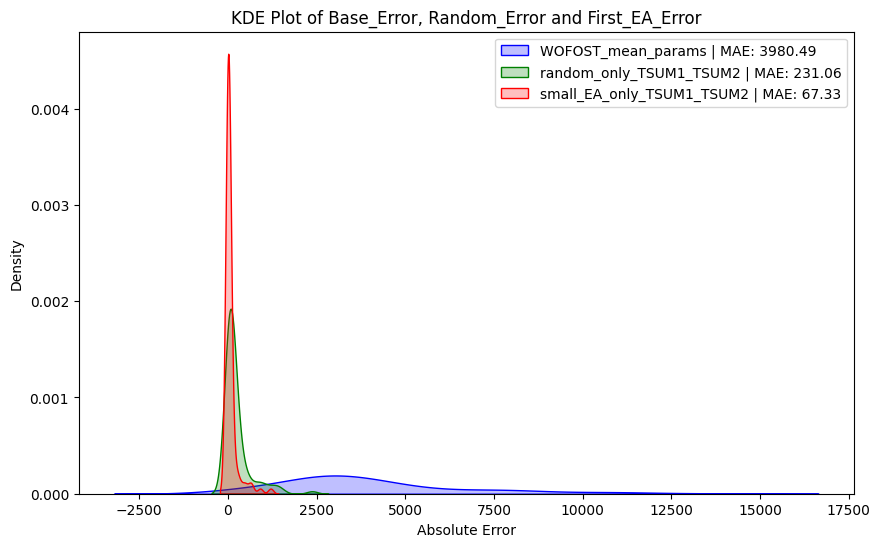

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=results_df, x="base_error", fill=True, color="blue",
            ax=ax, label=f"WOFOST_mean_params | MAE: {df['base_error'].mean():.2f}")
sns.kdeplot(data=results_df, x="fitness_random", fill=True, color="green",
            ax=ax, label=f"random_only_TSUM1_TSUM2 | MAE: {df['fitness_random'].mean():.2f}")
sns.kdeplot(data=results_df, x="fitness_ea", fill=True, color="red",
            ax=ax, label=f"small_EA_only_TSUM1_TSUM2 | MAE: {df['fitness_ea'].mean():.2f}")
plt.xlabel("Absolute Error")
ax.legend()
ax.set_title("KDE Plot of Base_Error, Random_Error and First_EA_Error")



Text(0.5, 1.0, 'Histogram plot of Base_Error, Random_Error and First_EA_Error')

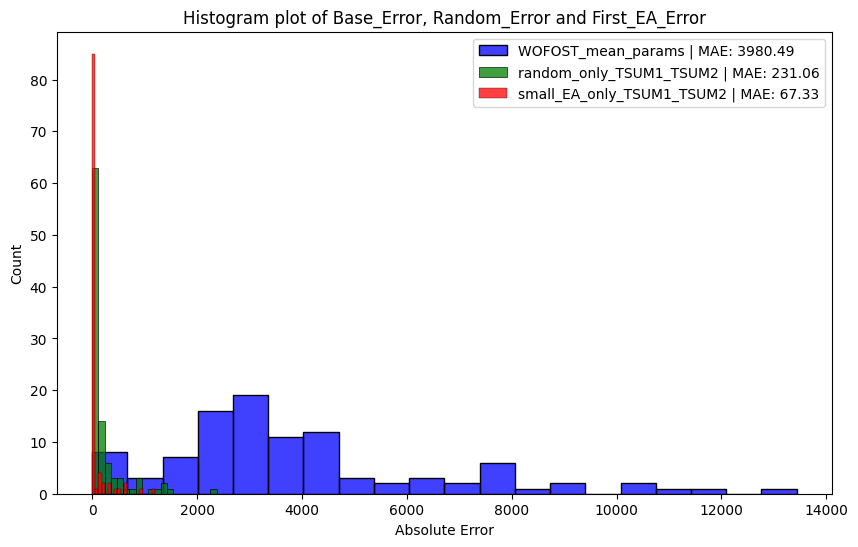

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=results_df, x="base_error", fill=True,
             color="blue", ax=ax,
             bins=20,
             label=f"WOFOST_mean_params | MAE: {df['base_error'].mean():.2f}")
sns.histplot(data=results_df, x="fitness_random", fill=True,
            color="green", ax=ax,
            bins=20,
            label=f"random_only_TSUM1_TSUM2 | MAE: {df['fitness_random'].mean():.2f}")
sns.histplot(data=results_df, x="fitness_ea",
            fill=True,
            color="red", ax=ax,
            bins=20,
            label=f"small_EA_only_TSUM1_TSUM2 | MAE: {df['fitness_ea'].mean():.2f}")
plt.xlabel("Absolute Error")
ax.legend()
ax.set_title("Histogram plot of Base_Error, Random_Error and First_EA_Error")